In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train), len(X_test)

(60000, 10000)

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train = X_train / 255
X_test = X_test / 255

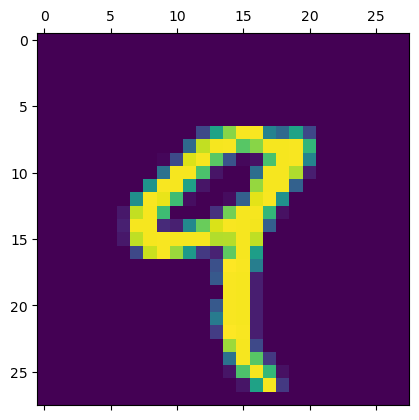

In [7]:
plt.matshow(X_train[4])

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_train_flattened.shape

(60000, 784)

In [9]:
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)
X_test_flattened.shape

(10000, 784)

In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
model = keras.Sequential(
    [keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")]
)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(X_train_flattened, y_train, epochs=5)

c:\Users\sakif\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 933us/step - accuracy: 0.8215 - loss: 0.7100
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.9130 - loss: 0.3066
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.9203 - loss: 0.2856
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.9249 - loss: 0.2674
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 956us/step - accuracy: 0.9251 - loss: 0.2655


In [12]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.9171 - loss: 0.3007


[0.26540184020996094, 0.9269000291824341]

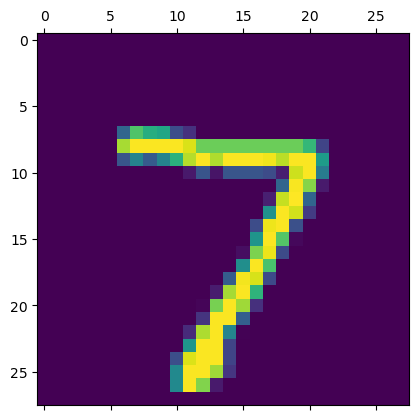

In [13]:
plt.matshow(X_test[0])

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.8839218e-01, 4.5480649e-03, 9.9977243e-01, 3.3225161e-01,
       8.6828428e-10, 8.9109850e-01, 8.8852644e-01, 8.9462612e-13,
       1.5838246e-01, 1.9351856e-09], dtype=float32)

In [15]:
np.argmax(y_predicted[1])

2

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    7,   10,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,    6,  950,   11,    9,    4,   11,    9,   25,    3],
       [   2,    0,   28,  909,    1,   33,    2,    8,   18,    9],
       [   1,    1,    6,    0,  912,    0,   11,    4,    8,   39],
       [   9,    2,    7,   26,    9,  788,   12,    4,   27,    8],
       [   7,    3,    9,    1,    7,   14,  912,    2,    3,    0],
       [   1,    5,   28,    4,    6,    1,    0,  949,    2,   32],
       [   7,    7,   11,   17,    9,   33,    9,   10,  864,    7],
       [  10,    7,    2,    9,   25,    9,    0,   23,    6,  918]])>

Text(95.72222222222221, 0.5, 'Truth')

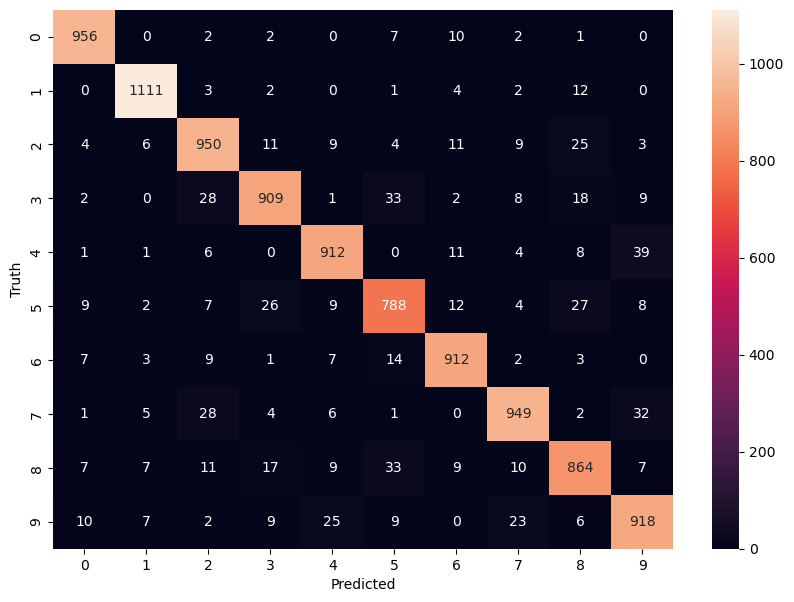

In [18]:
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [19]:
model = keras.Sequential(
    [
        keras.layers.Dense(100, input_shape=(784,), activation="relu"),
        keras.layers.Dense(10, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(X_train_flattened, y_train, epochs=5)

c:\Users\sakif\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8761 - loss: 0.4499
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9612 - loss: 0.1319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9729 - loss: 0.0917
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9791 - loss: 0.0692
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9844 - loss: 0.0509


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9704 - loss: 0.0877


[0.07648395001888275, 0.9750000238418579]

Text(95.72222222222221, 0.5, 'Truth')

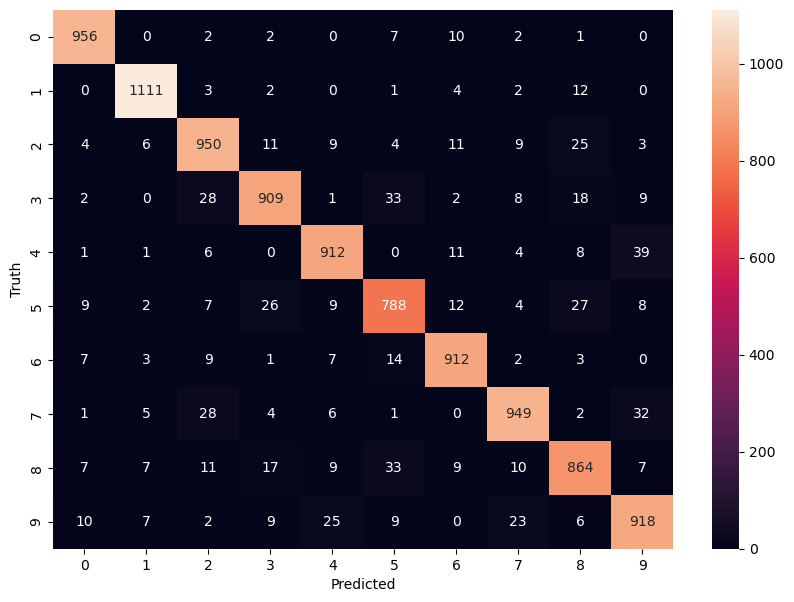

In [21]:
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [23]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(100, input_shape=(784,), activation="relu"),
        keras.layers.Dense(10, activation="sigmoid"),
    ]
)

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

c:\Users\sakif\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\sakif\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8724 - loss: 0.4496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9625 - loss: 0.1288
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9753 - loss: 0.0841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9797 - loss: 0.0632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.0468
